In [245]:
import torch
from matplotlib import pyplot as plt
from torch import Tensor

torch.set_printoptions(threshold=10, linewidth=128)  # for printing

In [246]:
MAX = 100
x = torch.linspace(0, 10, steps=MAX, dtype=float)
print(x.shape, x)

torch.Size([100]) tensor([ 0.0000,  0.1010,  0.2020,  ...,  9.7980,  9.8990, 10.0000], dtype=torch.float64)


In [247]:
y = 10 * x + torch.randint(-10, 10, (MAX,))
print(y.shape, y)

torch.Size([100]) tensor([ -6.0000,  -2.9899,  -2.9798,  ..., 106.9798, 102.9899,  92.0000], dtype=torch.float64)


$ y = wx + b $

In [248]:
class LinearRegession(torch.nn.Module):
    w: Tensor
    b: Tensor

    def __init__(self):
        super().__init__()
        self.w = torch.nn.Parameter(torch.tensor(5.))
        print(f"Init w : {self.w.shape}, {self.w}")

        self.b = torch.nn.Parameter(torch.tensor(1.))
        print(f"Init b : {self.b.shape}, {self.b}")

    def forward(self, x):
        return self.w * x + self.b


model = LinearRegession()

Init w : torch.Size([]), Parameter containing:
tensor(5., requires_grad=True)
Init b : torch.Size([]), Parameter containing:
tensor(1., requires_grad=True)


   0 : cost = 791.9835016835017
  10 : cost = 225.67329419538248
  20 : cost = 58.02504616737523
  30 : cost = 35.758546096807976
  40 : cost = 37.914045107349175
  50 : cost = 37.88939173590366
  60 : cost = 36.26625113000584
  70 : cost = 35.080507817339544
  80 : cost = 34.53562293232235
  90 : cost = 34.287197360697874
 100 : cost = 34.118716899957896


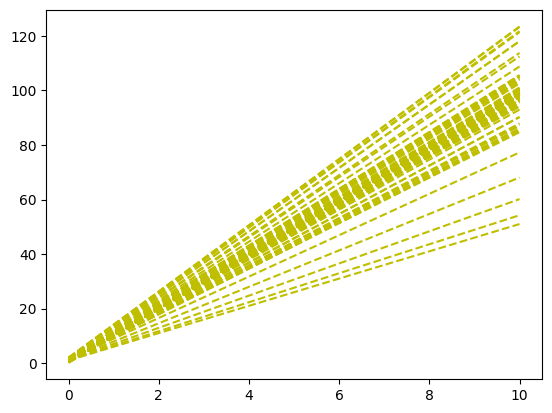

In [249]:
criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
for e in range(101):
    y_pred = model(x)
    cost = criterion(y_pred, y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if not e % 10:
        print(f"{e:4} : cost = {cost}")
    plt.plot(x.tolist(), y_pred.tolist(), '--y', label=f"epoch {e}")

In [250]:
# plt.subplot(211)
# plt.plot(x, y, 'oc')
# plt.plot(x, hypothesis(x), 'r')
# plt.xlabel('x axis')
# plt.ylabel('y axis')

In [251]:
# plt.subplot(212)
# plt.plot(costs)
# plt.xlabel('epoch')
# plt.ylabel('cost')